# Cyber Security In Banking
## Credit Card Fraud Detection



Amita Mehta (0730478),    
Rajit (0730468),    
Jai Surya (0731608)

### Import Packages

In [33]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

### Read the File

In [77]:
df = pd.read_csv('train_transaction.csv', index_col = 0, parse_dates = True)
df.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Undestanding the data

In [35]:
df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


### Data Cleaning

In [36]:

df.isnull().sum()


TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

In [37]:
df.skew()

TransactionID    -3.024053e-16
isFraud           5.061223e+00
TransactionDT     1.311547e-01
TransactionAmt    1.437449e+01
card1            -4.092898e-02
                      ...     
V335              5.414242e+01
V336              1.187230e+02
V337              8.577117e+01
V338              2.364451e+01
V339              4.891002e+01
Length: 380, dtype: float64

In [38]:
df.dropna(axis=1,inplace=True)
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,2987000,0,86400,68.5,W,13926,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0
1,2987001,0,86401,29.0,W,2755,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,2987002,0,86469,59.0,W,4663,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,2987003,0,86499,50.0,W,18132,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0
4,2987004,0,86506,50.0,H,4497,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [39]:
df.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'C11', 'C12', 'C13', 'C14'],
      dtype='object')

### Check Whether the data is balance or not

In [40]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['isFraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['isFraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 96.5 % of the dataset
Frauds 3.5 % of the dataset


Text(0.5, 1.0, 'Distribution of Credit Card Transactions')

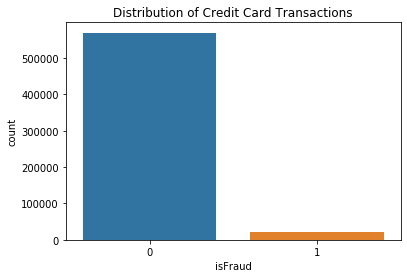

In [41]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(df['isFraud'])
plt.title('Distribution of Credit Card Transactions')

### Distribution Plot for Transaction amount and data time

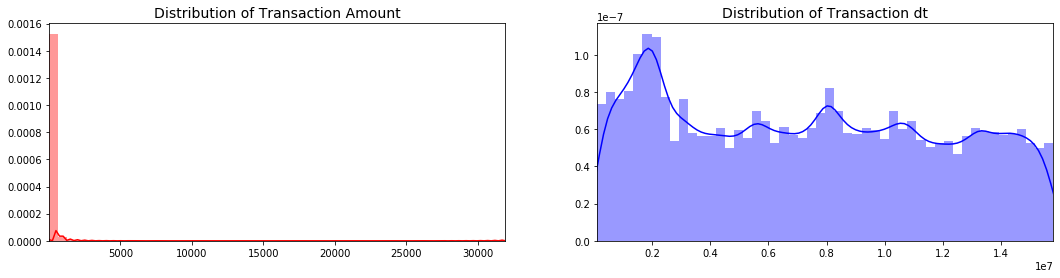

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['TransactionAmt'].values
time_val = df['TransactionDT'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction dt', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

### Pre-processing 

In [43]:
PATH = '../input/'
START_DATE = '2017-12-01'

In [44]:
import datetime
import math
import gc

In [78]:
test = pd.read_csv('test_transaction.csv', index_col = 0, parse_dates = True)

In [46]:
n_df = df.shape[0]
data = pd.concat([df, test], axis = 0, sort = False)
del df, test
gc.collect()

16092

In [47]:
# Preprocess date column
startdate = datetime.datetime.strptime(START_DATE, '%Y-%m-%d')
data['TransactionDT'] = data['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))

print(data['TransactionDT'].head())
print(data['TransactionDT'].tail())

0   2017-12-02 00:00:00
1   2017-12-02 00:00:01
2   2017-12-02 00:01:09
3   2017-12-02 00:01:39
4   2017-12-02 00:01:46
Name: TransactionDT, dtype: datetime64[ns]
506686   2018-12-31 23:57:59
506687   2018-12-31 23:58:07
506688   2018-12-31 23:58:46
506689   2018-12-31 23:58:57
506690   2018-12-31 23:59:05
Name: TransactionDT, dtype: datetime64[ns]


### Scaling

In [48]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['TransactionAmt'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['TransactionDT'].values.reshape(-1,1))

data.drop(['TransactionAmt','TransactionDT'], axis=1, inplace=True)

In [49]:
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

data.head()

,scaled_amount,scaled_time,TransactionID,isFraud,ProductCD,card1,C1,C2,C3,C4,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,0.006627,-0.725289,2987000,0.0,W,13926,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.469277,-0.725289,2987001,0.0,W,2755,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.107831,-0.725286,2987002,0.0,W,4663,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.216265,-0.725284,2987003,0.0,W,18132,2.0,5.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.216265,-0.725284,2987004,0.0,H,4497,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


X = data.drop('isFraud', axis=1)
y = data['isFraud']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for df_index, test_index in sss.split(X, y):
    print("df:", df_index, "Test:", test_index)
    original_Xdf, original_Xtest = X.iloc[df_index], X.iloc[test_index]
    original_ydf, original_ytest = y.iloc[df_index], y.iloc[test_index]




# Turn into an array
original_Xdf = original_Xdf.values
original_Xtest = original_Xtest.values
original_ydf = original_ydf.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
df_unique_label, df_counts_label = np.unique(original_ydf, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(df_counts_label/ len(original_ydf))
print(test_counts_label/ len(original_ytest))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [108]:


data = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_data = data.loc[data['isFraud'] == 1]
non_fraud_data = data.loc[data['isFraud'] == 0][:492]

normal_distributed_data = pd.concat([fraud_data, non_fraud_data])

# Shuffle dataframe rows
new_data = normal_distributed_data.sample(frac=1, random_state=42)

new_data.head()


,scaled_amount,scaled_time,TransactionID,isFraud,ProductCD,card1,C1,C2,C3,C4,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
160894,0.029133,-0.559402,3147894,1.0,C,3643,5.0,3.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34728,2.795783,-0.686606,3021728,1.0,H,4141,5.0,6.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141795,0.325904,-0.582631,3128795,1.0,W,1675,6.0,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106137,4.603012,-0.623139,3093137,1.0,R,7585,1.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47851,-0.396988,-0.672761,3034851,1.0,W,15066,7.0,5.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Distribution of the Classes in the subsample dataset
1.0    0.976743
0.0    0.023257
Name: isFraud, dtype: float64


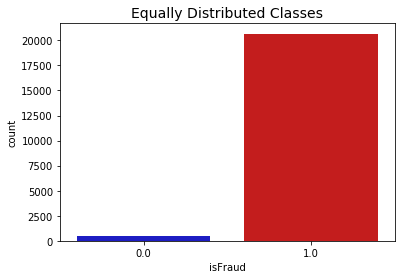

In [109]:
print('Distribution of the Classes in the subsample dataset')
print(new_data['isFraud'].value_counts()/len(new_data))



sns.countplot('isFraud', data=new_data, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [110]:
new_data = new_data.drop('ProductCD', axis = 1, inplace=True)

In [111]:
new_data.dropna(axis=1,inplace=True)
new_data.head()

AttributeError: 'NoneType' object has no attribute 'dropna'

In [95]:
# Undersampling before cross validating (prone to overfit)
X = new_data.drop('isFraud', axis=1)
y = new_data['isFraud']


In [96]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

In [99]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "Support Vector Classifier": SVC()
}

In [100]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

C:\Users\Jai Surya\Anaconda3\envs\DAB300\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Jai Surya\Anaconda3\envs\DAB300\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jai Surya\Anaconda3\envs\DAB300\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [87]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

NameError: name 'log_reg' is not defined

In [88]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

ValueError: could not convert string to float: 'S'